# -------------------------------NEURAL-NETWORKS-----------------------------------

## Imports

In [1]:
import pandas as pd
import numpy as np
import csv
from ipykernel import kernelapp as app
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
loan_df = pd.read_csv('/Users/sonalichaudhari/Desktop/Loan.csv', low_memory=False) 
del loan_df['Unnamed: 0']
decline_df= pd.read_csv(open('/Users/sonalichaudhari/Desktop/Decline.csv','rU'), encoding='utf-8')
del decline_df['Unnamed: 0']
loan_df=loan_df[['id','loan_amnt', 'purpose', 'risk_score', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month', 'approval']]
decline_df =decline_df[['id','loan_amnt','purpose', 'risk_score', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month','approval']]

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()


In [6]:
d= decline_df[:1641127]
l = loan_df[:1641127]
l.shape

(1641117, 11)

In [7]:
com = pd.concat([d,l])
com.shape

(3282244, 11)

## Cross Validation for splitting the data in train and test sets

In [21]:
# columns to consider
cols = ['loan_amnt','emp_length','purpose','risk_score','dti','State']

In [22]:
X = com[cols]
y = com['approval']

In [23]:
#Flatten y into a 1-D array
y = np.ravel(y)

In [24]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['pur'] = label_encoder.fit_transform(X_train['purpose'])
X_test['pur'] = label_encoder.fit_transform(X_test['purpose'])

X_train['state'] = label_encoder.fit_transform(X_train['State'])
X_test['state'] = label_encoder.fit_transform(X_test['State'])

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [26]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [27]:
X_train.head()

,loan_amnt,emp_length,risk_score,dti,pur,state
804933,6000.0,0,594.0,5.09,47232,34
1375442,20000.0,10,692.0,5.41,37594,34
425306,25275.0,10,677.0,7.09,38308,31
1603702,10000.0,4,697.0,8.28,38308,41
17124,5000.0,10,630.0,28.72,3622,35


In [36]:
# Creating the model
nn = MLPRegressor(hidden_layer_sizes=(50,20,5),activation='relu',solver='adam',learning_rate='adaptive',verbose=False)
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20, 5), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
accuracy = nn.score(X_train, y_train)
print(accuracy)

-1.9428393941e-05


In [31]:
#Run the model on the test set
y_pred = nn.predict(X_test)

In [ ]:
y_pred

In [ ]:
# Predict the values for test and train using the model
y_test_predicted = rf.predict(X_test)
y_train_predicted= rf.predict(X_train)

In [ ]:
# Caluclate the rms and mae values
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

In [146]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4539991  298853]
 [ 214737  279881]]


In [147]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


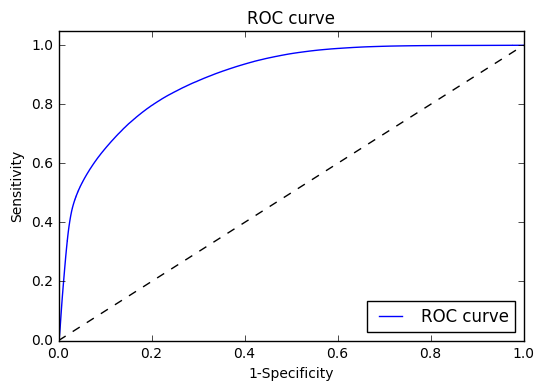

In [148]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()